In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [7]:
loan_dataset = pd.read_csv('Dataset/train_u6lujuX_CVtuZ9i (1).csv')

In [8]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [9]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [13]:
loan_dataset.shape

(614, 13)

In [11]:
loan_dataset.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [17]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
# label Encoding



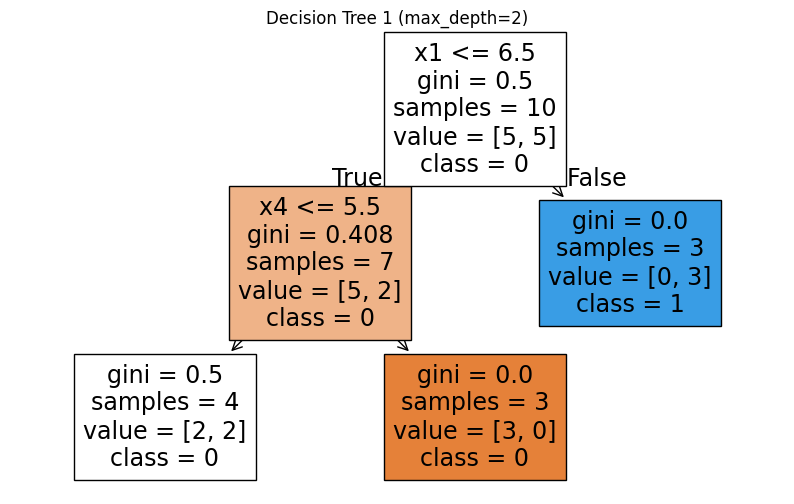

Decision Tree 1 Rules:
|--- x1 <= 6.50
|   |--- x4 <= 5.50
|   |   |--- class: 0
|   |--- x4 >  5.50
|   |   |--- class: 0
|--- x1 >  6.50
|   |--- class: 1




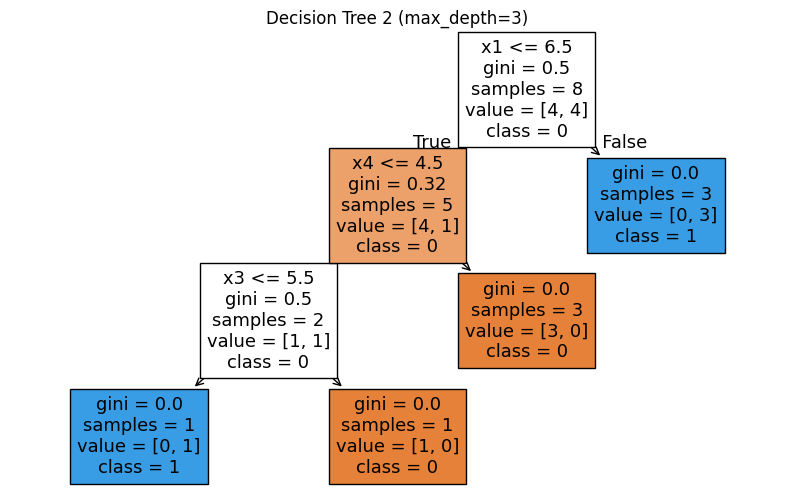

Decision Tree 2 Rules:
|--- x1 <= 6.50
|   |--- x4 <= 4.50
|   |   |--- x3 <= 5.50
|   |   |   |--- class: 1
|   |   |--- x3 >  5.50
|   |   |   |--- class: 0
|   |--- x4 >  4.50
|   |   |--- class: 0
|--- x1 >  6.50
|   |--- class: 1




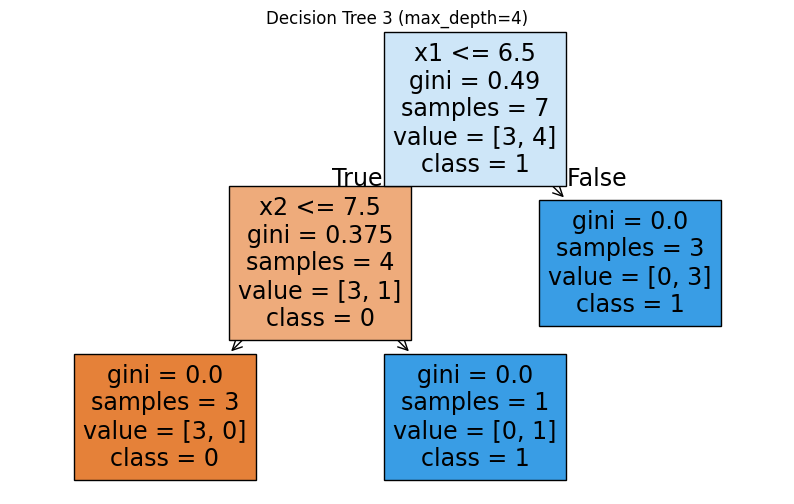

Decision Tree 3 Rules:
|--- x1 <= 6.50
|   |--- x2 <= 7.50
|   |   |--- class: 0
|   |--- x2 >  7.50
|   |   |--- class: 1
|--- x1 >  6.50
|   |--- class: 1




In [2]:
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz
from sklearn import tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic sample dataset
data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "x1": [2, 7, 4, 9, 6, 5, 3, 8, 6, 4],
    "x2": [3, 6, 2, 5, 7, 8, 1, 4, 9, 2],
    "x3": [5, 8, 6, 3, 4, 2, 9, 7, 1, 5],
    "x4": [9, 1, 3, 2, 6, 5, 7, 8, 4, 3],
    "y": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Features and target
X = df[["x1", "x2", "x3", "x4"]]
y = df["y"]

# Train decision tree
def train_and_visualize_tree(X, y, max_depth, random_state, tree_num):
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    tree_model.fit(X, y)
    
    # Visualize tree
    fig, ax = plt.subplots(figsize=(10, 6))
    tree.plot_tree(
        tree_model, 
        feature_names=["x1", "x2", "x3", "x4"], 
        class_names=["0", "1"], 
        filled=True, 
        ax=ax
    )
    plt.title(f"Decision Tree {tree_num} (max_depth={max_depth})")
    plt.show()
    
    # Export rules
    tree_rules = export_text(tree_model, feature_names=["x1", "x2", "x3", "x4"])
    print(f"Decision Tree {tree_num} Rules:\n{tree_rules}\n")

# Train and visualize 3 different trees
train_and_visualize_tree(X, y, max_depth=2, random_state=42, tree_num=1)
train_and_visualize_tree(X.sample(frac=0.8, random_state=1), y.sample(frac=0.8, random_state=1), max_depth=3, random_state=43, tree_num=2)
train_and_visualize_tree(X.sample(frac=0.7, random_state=2), y.sample(frac=0.7, random_state=2), max_depth=4, random_state=44, tree_num=3)


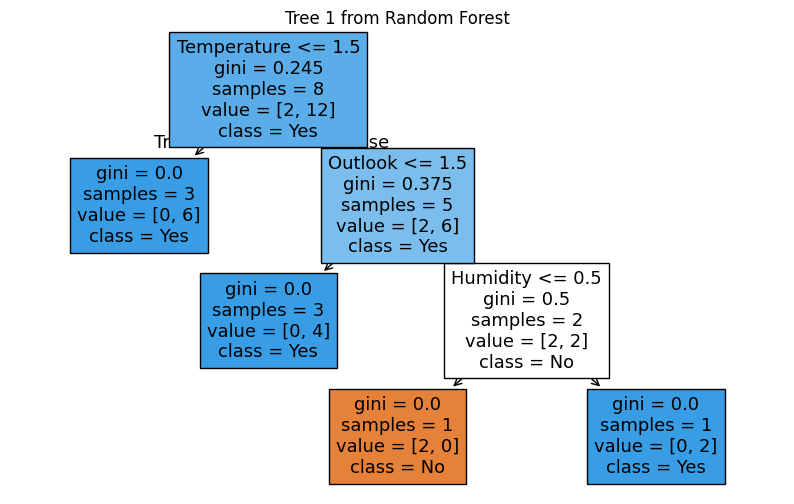

Rules for Tree 1:
|--- Temperature <= 1.50
|   |--- class: 1.0
|--- Temperature >  1.50
|   |--- Outlook <= 1.50
|   |   |--- class: 1.0
|   |--- Outlook >  1.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- Humidity >  0.50
|   |   |   |--- class: 1.0




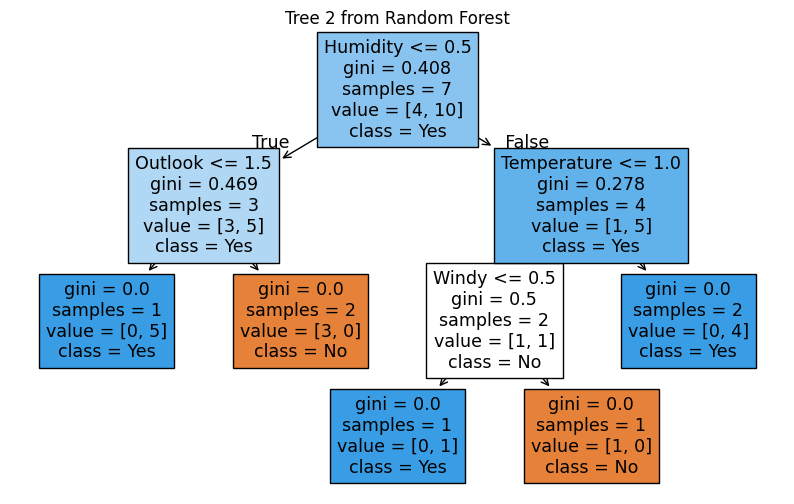

Rules for Tree 2:
|--- Humidity <= 0.50
|   |--- Outlook <= 1.50
|   |   |--- class: 1.0
|   |--- Outlook >  1.50
|   |   |--- class: 0.0
|--- Humidity >  0.50
|   |--- Temperature <= 1.00
|   |   |--- Windy <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- Windy >  0.50
|   |   |   |--- class: 0.0
|   |--- Temperature >  1.00
|   |   |--- class: 1.0




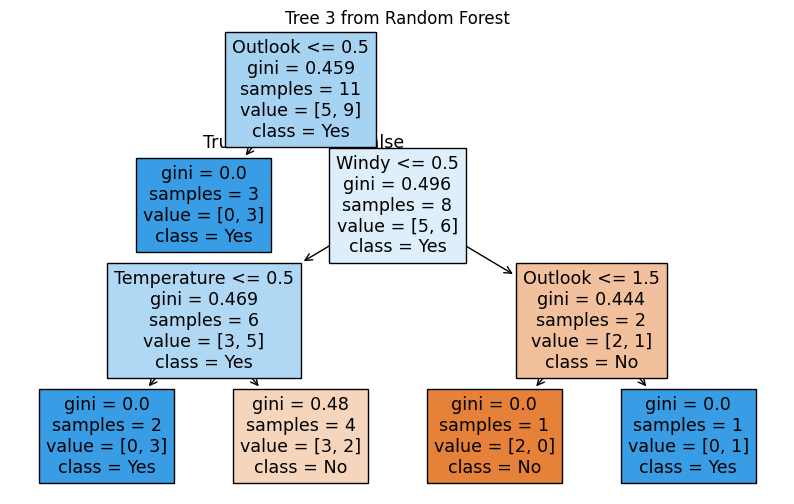

Rules for Tree 3:
|--- Outlook <= 0.50
|   |--- class: 1.0
|--- Outlook >  0.50
|   |--- Windy <= 0.50
|   |   |--- Temperature <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- Temperature >  0.50
|   |   |   |--- class: 0.0
|   |--- Windy >  0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- class: 0.0
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 1.0




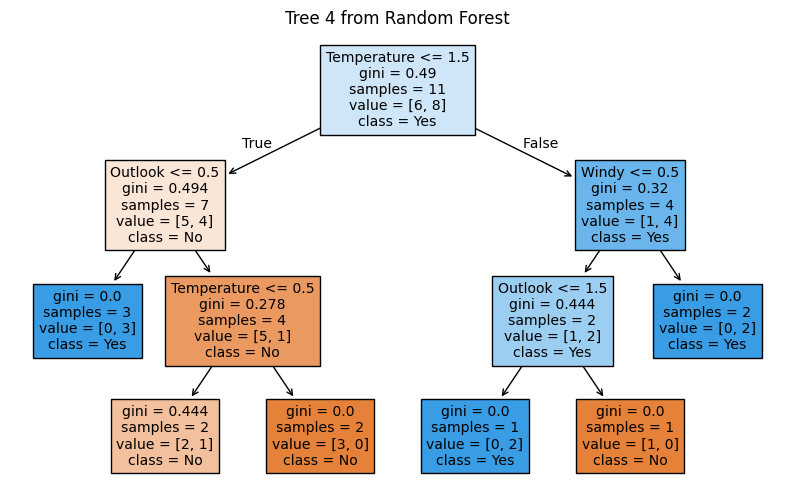

Rules for Tree 4:
|--- Temperature <= 1.50
|   |--- Outlook <= 0.50
|   |   |--- class: 1.0
|   |--- Outlook >  0.50
|   |   |--- Temperature <= 0.50
|   |   |   |--- class: 0.0
|   |   |--- Temperature >  0.50
|   |   |   |--- class: 0.0
|--- Temperature >  1.50
|   |--- Windy <= 0.50
|   |   |--- Outlook <= 1.50
|   |   |   |--- class: 1.0
|   |   |--- Outlook >  1.50
|   |   |   |--- class: 0.0
|   |--- Windy >  0.50
|   |   |--- class: 1.0




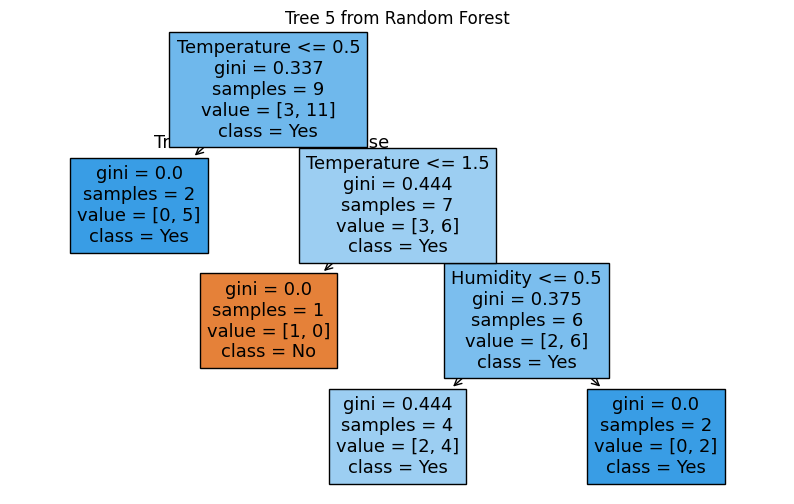

Rules for Tree 5:
|--- Temperature <= 0.50
|   |--- class: 1.0
|--- Temperature >  0.50
|   |--- Temperature <= 1.50
|   |   |--- class: 0.0
|   |--- Temperature >  1.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- class: 1.0
|   |   |--- Humidity >  0.50
|   |   |   |--- class: 1.0




In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Weather dataset
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rainy", "Rainy", "Rainy", "Overcast", "Sunny", "Sunny", "Rainy", "Sunny", "Overcast", "Overcast", "Rainy"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Windy": [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}
df = pd.DataFrame(data)

# Encode categorical features
le = LabelEncoder()
for column in ["Outlook", "Temperature", "Humidity", "Windy", "Play"]:
    df[column] = le.fit_transform(df[column])

# Features and target
X = df[["Outlook", "Temperature", "Humidity", "Windy"]]
y = df["Play"]

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=5, max_depth=3, random_state=42)
rf_model.fit(X, y)

# Visualize individual trees in the Random Forest
def visualize_rf_trees(rf_model, feature_names, tree_idx):
    tree = rf_model.estimators_[tree_idx]  # Extract specific tree from the forest
    
    # Plot tree visualization
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_tree(
        tree, 
        feature_names=feature_names, 
        class_names=["No", "Yes"], 
        filled=True, 
        ax=ax
    )
    plt.title(f"Tree {tree_idx + 1} from Random Forest")
    plt.show()
    
    # Export textual rules
    tree_rules = export_text(tree, feature_names=feature_names)
    print(f"Rules for Tree {tree_idx + 1}:\n{tree_rules}\n")

# Visualize each tree in the Random Forest
for i in range(rf_model.n_estimators):
    visualize_rf_trees(rf_model, ["Outlook", "Temperature", "Humidity", "Windy"], i)


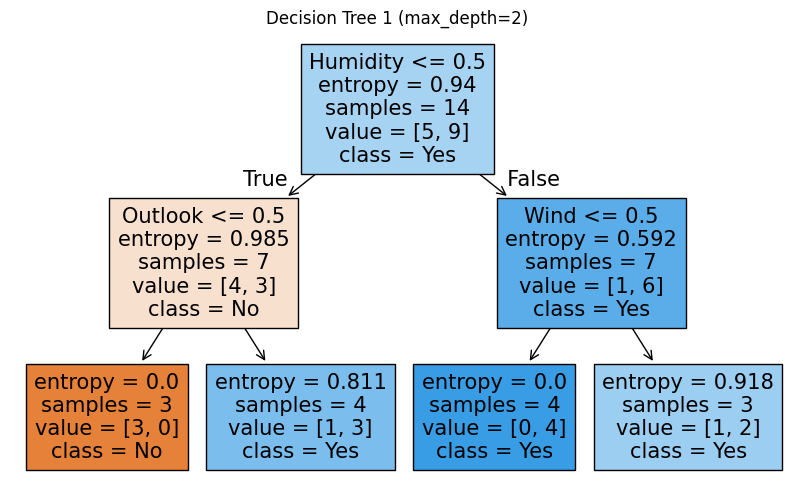

Decision Tree 1 Rules:
|--- Humidity <= 0.50
|   |--- Outlook <= 0.50
|   |   |--- class: 0
|   |--- Outlook >  0.50
|   |   |--- class: 1
|--- Humidity >  0.50
|   |--- Wind <= 0.50
|   |   |--- class: 1
|   |--- Wind >  0.50
|   |   |--- class: 1




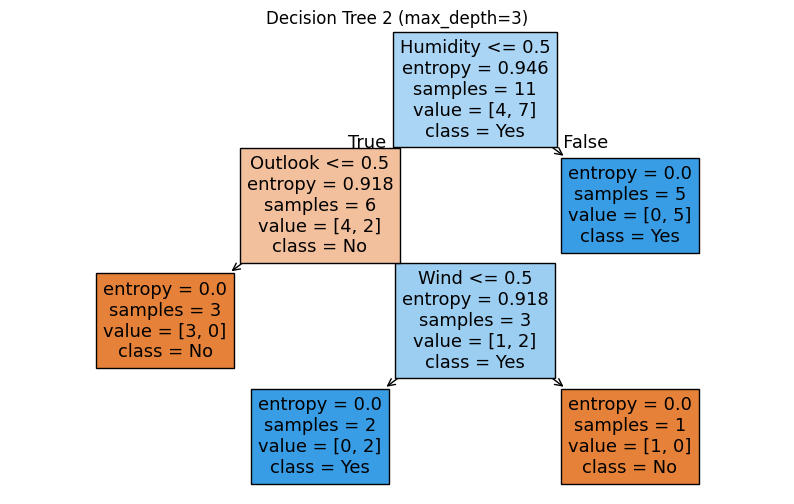

Decision Tree 2 Rules:
|--- Humidity <= 0.50
|   |--- Outlook <= 0.50
|   |   |--- class: 0
|   |--- Outlook >  0.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 0
|--- Humidity >  0.50
|   |--- class: 1




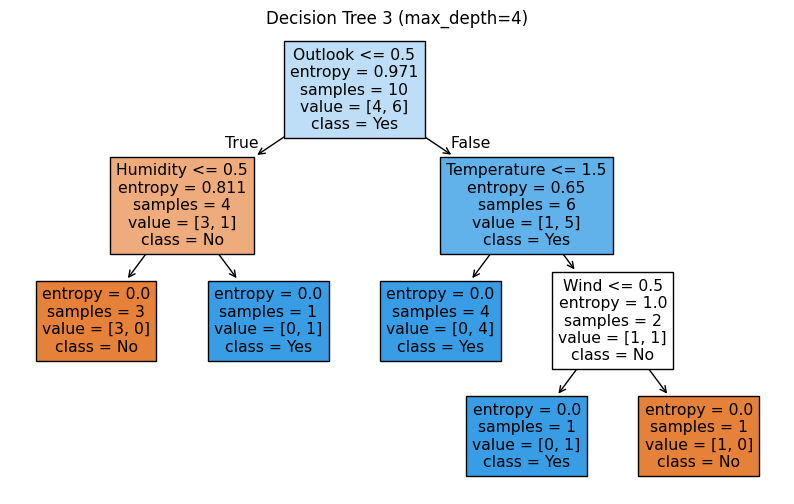

Decision Tree 3 Rules:
|--- Outlook <= 0.50
|   |--- Humidity <= 0.50
|   |   |--- class: 0
|   |--- Humidity >  0.50
|   |   |--- class: 1
|--- Outlook >  0.50
|   |--- Temperature <= 1.50
|   |   |--- class: 1
|   |--- Temperature >  1.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 0




In [11]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt

# Define the Play Tennis dataset
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Map categorical variables to numeric
df_encoded = df.copy()
df_encoded["Outlook"] = df["Outlook"].map({"Sunny": 0, "Overcast": 1, "Rain": 2})
df_encoded["Temperature"] = df["Temperature"].map({"Hot": 0, "Mild": 1, "Cool": 2})
df_encoded["Humidity"] = df["Humidity"].map({"High": 0, "Normal": 1})
df_encoded["Wind"] = df["Wind"].map({"Weak": 0, "Strong": 1})
df_encoded["Play"] = df["Play"].map({"No": 0, "Yes": 1})

# Features and target
X = df_encoded[["Outlook", "Temperature", "Humidity", "Wind"]]
y = df_encoded["Play"]

# Train and visualize decision trees
def train_and_visualize_tree(X, y, max_depth, random_state, tree_num):
    tree_model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state, criterion="entropy")
    tree_model.fit(X, y)
    
    # Visualize tree
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_tree(
        tree_model, 
        feature_names=["Outlook", "Temperature", "Humidity", "Wind"], 
        class_names=["No", "Yes"], 
        filled=True, 
        ax=ax
    )
    plt.title(f"Decision Tree {tree_num} (max_depth={max_depth})")
    plt.show()
    
    # Export rules
    tree_rules = export_text(tree_model, feature_names=["Outlook", "Temperature", "Humidity", "Wind"])
    print(f"Decision Tree {tree_num} Rules:\n{tree_rules}\n")

# Train and visualize 3 different trees
train_and_visualize_tree(X, y, max_depth=2, random_state=42, tree_num=1)
train_and_visualize_tree(X.sample(frac=0.8, random_state=1), y.sample(frac=0.8, random_state=1), max_depth=3, random_state=43, tree_num=2)
train_and_visualize_tree(X.sample(frac=0.7, random_state=2), y.sample(frac=0.7, random_state=2), max_depth=4, random_state=44, tree_num=3)


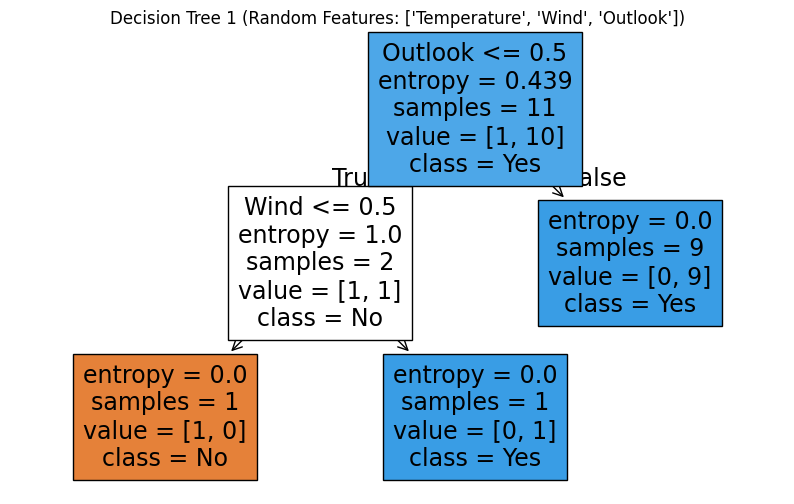

Decision Tree 1 Rules:
|--- Outlook <= 0.50
|   |--- Wind <= 0.50
|   |   |--- class: 0
|   |--- Wind >  0.50
|   |   |--- class: 1
|--- Outlook >  0.50
|   |--- class: 1




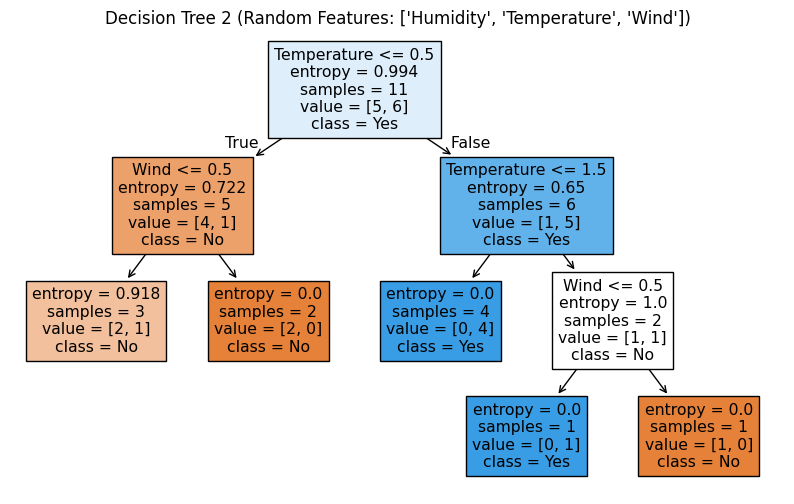

Decision Tree 2 Rules:
|--- Temperature <= 0.50
|   |--- Wind <= 0.50
|   |   |--- class: 0
|   |--- Wind >  0.50
|   |   |--- class: 0
|--- Temperature >  0.50
|   |--- Temperature <= 1.50
|   |   |--- class: 1
|   |--- Temperature >  1.50
|   |   |--- Wind <= 0.50
|   |   |   |--- class: 1
|   |   |--- Wind >  0.50
|   |   |   |--- class: 0




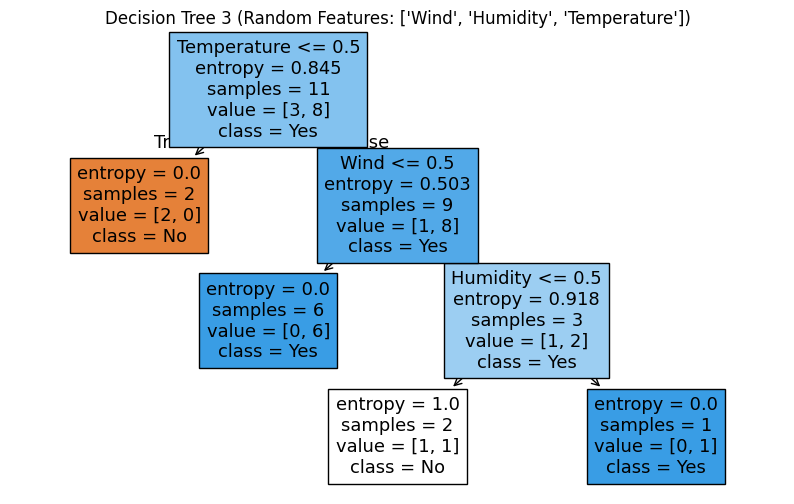

Decision Tree 3 Rules:
|--- Temperature <= 0.50
|   |--- class: 0
|--- Temperature >  0.50
|   |--- Wind <= 0.50
|   |   |--- class: 1
|   |--- Wind >  0.50
|   |   |--- Humidity <= 0.50
|   |   |   |--- class: 0
|   |   |--- Humidity >  0.50
|   |   |   |--- class: 1




In [13]:
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Define the Play Tennis dataset
data = {
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Map categorical variables to numeric
df_encoded = df.copy()
df_encoded["Outlook"] = df["Outlook"].map({"Sunny": 0, "Overcast": 1, "Rain": 2})
df_encoded["Temperature"] = df["Temperature"].map({"Hot": 0, "Mild": 1, "Cool": 2})
df_encoded["Humidity"] = df["Humidity"].map({"High": 0, "Normal": 1})
df_encoded["Wind"] = df["Wind"].map({"Weak": 0, "Strong": 1})
df_encoded["Play"] = df["Play"].map({"No": 0, "Yes": 1})

# Features and target
X = df_encoded[["Outlook", "Temperature", "Humidity", "Wind"]]
y = df_encoded["Play"]

# Train and visualize decision trees
def train_tree_with_sampling(X, y, tree_num, random_state):
    # Row sampling (bootstrap)
    X_sample = X.sample(frac=0.8, replace=True, random_state=random_state)
    y_sample = y.loc[X_sample.index]

    # Feature sampling
    sampled_features = X_sample.sample(axis=1, n=3, random_state=random_state)  # Choose 3 random features
    feature_names = sampled_features.columns.tolist()
    
    # Train a decision tree
    tree_model = DecisionTreeClassifier(max_depth=3, random_state=random_state, criterion="entropy")
    tree_model.fit(sampled_features, y_sample)
    
    # Visualize the tree
    fig, ax = plt.subplots(figsize=(10, 6))
    plot_tree(
        tree_model, 
        feature_names=feature_names, 
        class_names=["No", "Yes"], 
        filled=True, 
        ax=ax
    )
    plt.title(f"Decision Tree {tree_num} (Random Features: {feature_names})")
    plt.show()
    
    # Print rules
    tree_rules = export_text(tree_model, feature_names=feature_names)
    print(f"Decision Tree {tree_num} Rules:\n{tree_rules}\n")

# Train and visualize 3 trees with row and feature sampling
train_tree_with_sampling(X, y, tree_num=1, random_state=42)
train_tree_with_sampling(X, y, tree_num=2, random_state=43)
train_tree_with_sampling(X, y, tree_num=3, random_state=44)


Decision Tree 1
Sampled Rows (IDs): [2, 1, 3, 5, 4]
Sampled Features: ['Outlook', 'Humidity']
   Outlook  Humidity
2        1         0
1        0         0
3        2         0
5        2         1
4        2         1



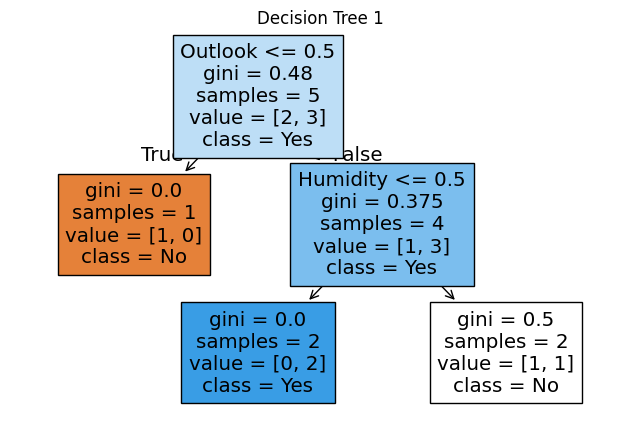

Decision Tree 2
Sampled Rows (IDs): [4, 1, 3, 0, 2]
Sampled Features: ['Temperature', 'Wind']
   Temperature  Wind
4            2     0
1            0     1
3            1     0
0            0     0
2            0     0



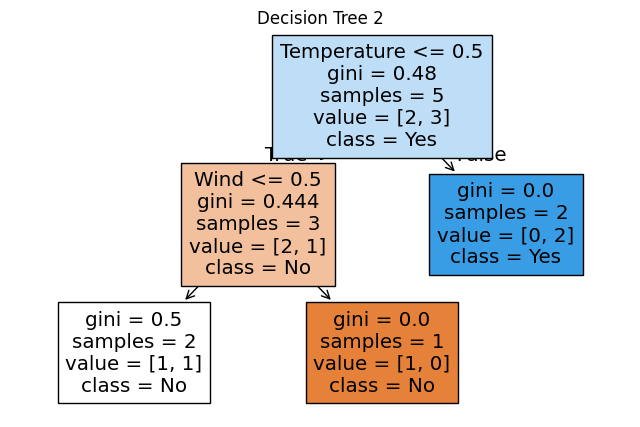

Decision Tree 3
Sampled Rows (IDs): [3, 2, 5, 1, 4]
Sampled Features: ['Outlook', 'Wind']
   Outlook  Wind
3        2     0
2        1     0
5        2     1
1        0     1
4        2     0



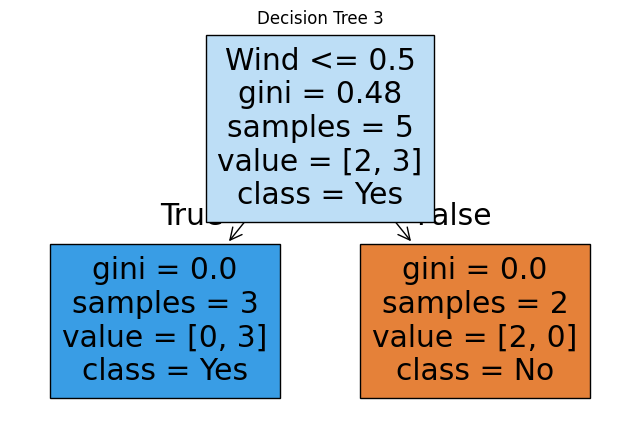

In [14]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt

# Define the Play Tennis dataset
data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Map categorical variables to numeric
df_encoded = df.copy()
df_encoded["Outlook"] = df["Outlook"].map({"Sunny": 0, "Overcast": 1, "Rain": 2})
df_encoded["Temperature"] = df["Temperature"].map({"Hot": 0, "Mild": 1, "Cool": 2})
df_encoded["Humidity"] = df["Humidity"].map({"High": 0, "Normal": 1})
df_encoded["Wind"] = df["Wind"].map({"Weak": 0, "Strong": 1})
df_encoded["Play"] = df["Play"].map({"No": 0, "Yes": 1})

# Features and target
X = df_encoded[["Outlook", "Temperature", "Humidity", "Wind"]]
y = df_encoded["Play"]

# Sampling configurations for trees
sampling_config = [
    {"rows": [2, 1, 3, 5, 4], "features": ["Outlook", "Humidity"]},
    {"rows": [4, 1, 3, 0, 2], "features": ["Temperature", "Wind"]},
    {"rows": [3, 2, 5, 1, 4], "features": ["Outlook", "Wind"]},
]

# Train and visualize decision trees
for i, config in enumerate(sampling_config):
    sampled_X = X.loc[config["rows"], config["features"]]
    sampled_y = y.loc[config["rows"]]
    
    # Train a decision tree
    tree_model = DecisionTreeClassifier(max_depth=3, random_state=i)
    tree_model.fit(sampled_X, sampled_y)
    
    # Visualize sampled rows and features
    print(f"Decision Tree {i + 1}")
    print(f"Sampled Rows (IDs): {config['rows']}")
    print(f"Sampled Features: {config['features']}")
    print(sampled_X)
    print()
    
    # Visualize the tree
    fig, ax = plt.subplots(figsize=(8, 5))
    plot_tree(
        tree_model, 
        feature_names=config["features"], 
        class_names=["No", "Yes"], 
        filled=True, 
        ax=ax
    )
    plt.title(f"Decision Tree {i + 1}")
    plt.show()


Decision Tree 1
Sampled Rows (IDs): [np.int64(7), np.int64(4), np.int64(13), np.int64(11), np.int64(8), np.int64(13), np.int64(5), np.int64(7), np.int64(10), np.int64(3), np.int64(7), np.int64(11), np.int64(11), np.int64(8)]
Sampled Features: ['Wind', 'Temperature', 'Humidity']
    Wind  Temperature  Humidity
6      1            2         1
3      0            1         0
12     0            0         1
10     1            1         1
7      0            1         0 



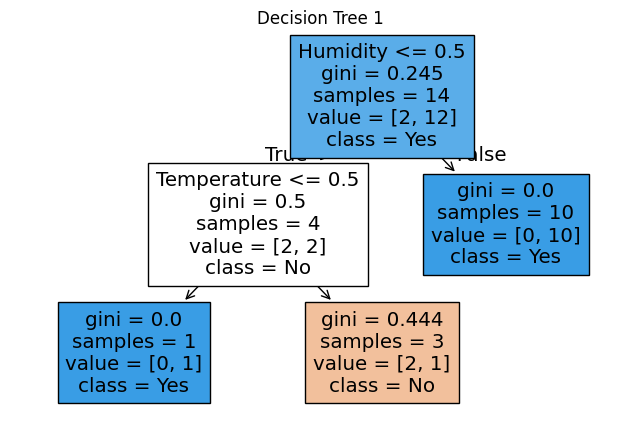

Decision Tree 2
Sampled Rows (IDs): [np.int64(5), np.int64(2), np.int64(8), np.int64(12), np.int64(14), np.int64(6), np.int64(2), np.int64(12), np.int64(5), np.int64(1), np.int64(12), np.int64(10), np.int64(6), np.int64(13)]
Sampled Features: ['Temperature', 'Humidity', 'Outlook']
    Temperature  Humidity  Outlook
4             2         1        2
1             0         0        0
7             1         0        0
11            1         0        1
13            1         0        2 



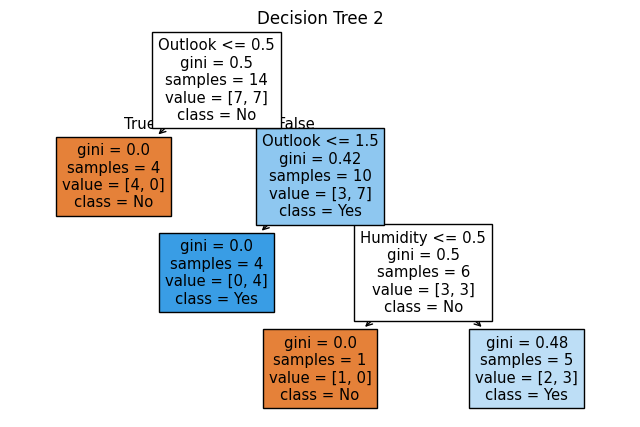

Decision Tree 3
Sampled Rows (IDs): [np.int64(11), np.int64(11), np.int64(10), np.int64(12), np.int64(12), np.int64(14), np.int64(14), np.int64(14), np.int64(3), np.int64(12), np.int64(7), np.int64(4), np.int64(9), np.int64(3)]
Sampled Features: ['Temperature', 'Wind', 'Humidity']
    Temperature  Wind  Humidity
10            1     1         1
10            1     1         1
9             1     0         1
11            1     1         0
11            1     1         0 



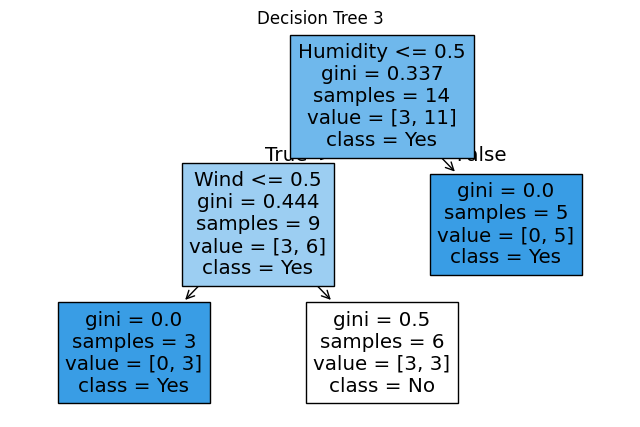

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the Play Tennis dataset
data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Map categorical variables to numeric
df_encoded = df.copy()
df_encoded["Outlook"] = df["Outlook"].map({"Sunny": 0, "Overcast": 1, "Rain": 2})
df_encoded["Temperature"] = df["Temperature"].map({"Hot": 0, "Mild": 1, "Cool": 2})
df_encoded["Humidity"] = df["Humidity"].map({"High": 0, "Normal": 1})
df_encoded["Wind"] = df["Wind"].map({"Weak": 0, "Strong": 1})
df_encoded["Play"] = df["Play"].map({"No": 0, "Yes": 1})

# Features and target
X = df_encoded[["Outlook", "Temperature", "Humidity", "Wind"]]
y = df_encoded["Play"]

# Define sampling configurations for trees
n_trees = 3  # Number of trees
np.random.seed(42)

# Train and visualize decision trees
for i in range(1, n_trees + 1):
    # Row sampling (with replacement)
    sampled_indices = np.random.choice(X.index, size=len(X), replace=True)
    sampled_X = X.loc[sampled_indices]
    sampled_y = y.loc[sampled_indices]
    
    # Feature sampling (randomly pick 3 features for each tree)
    sampled_features = np.random.choice(X.columns, size=3, replace=False)
    sampled_X = sampled_X[sampled_features]
    
    # Train the decision tree
    tree_model = DecisionTreeClassifier(max_depth=3, random_state=i)
    tree_model.fit(sampled_X, sampled_y)
    
    # Display sampled rows and features
    print(f"Decision Tree {i}")
    print(f"Sampled Rows (IDs): {list(sampled_indices + 1)}")  # +1 to match the original dataset IDs
    print(f"Sampled Features: {list(sampled_features)}")
    print(sampled_X.head(), "\n")
    
    # Visualize the tree
    fig, ax = plt.subplots(figsize=(8, 5))
    plot_tree(
        tree_model, 
        feature_names=sampled_features, 
        class_names=["No", "Yes"], 
        filled=True, 
        ax=ax
    )
    plt.title(f"Decision Tree {i}")
    plt.show()


Decision Tree 1
Sampled Rows (IDs): [np.int64(7), np.int64(4), np.int64(13), np.int64(11), np.int64(8), np.int64(13), np.int64(5), np.int64(7), np.int64(10), np.int64(3), np.int64(7), np.int64(11), np.int64(11), np.int64(8)]
Sampled Features: ['Wind', 'Temperature', 'Humidity']
    Wind  Temperature  Humidity
6      1            2         1
3      0            1         0
12     0            0         1
10     1            1         1
7      0            1         0 



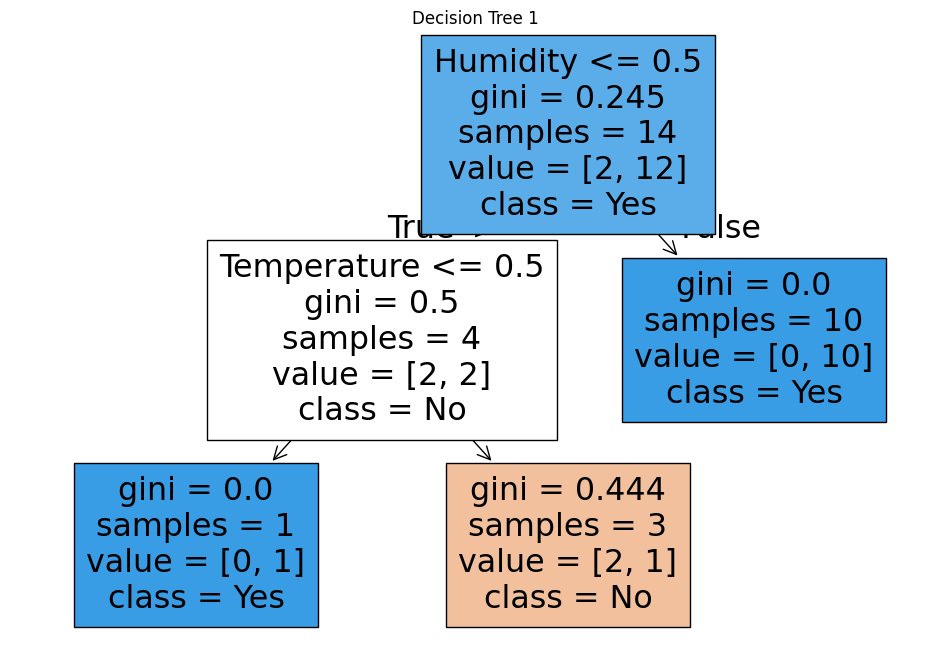

Decision Tree 2
Sampled Rows (IDs): [np.int64(5), np.int64(2), np.int64(8), np.int64(12), np.int64(14), np.int64(6), np.int64(2), np.int64(12), np.int64(5), np.int64(1), np.int64(12), np.int64(10), np.int64(6), np.int64(13)]
Sampled Features: ['Temperature', 'Humidity', 'Outlook']
    Temperature  Humidity  Outlook
4             2         1        2
1             0         0        0
7             1         0        0
11            1         0        1
13            1         0        2 



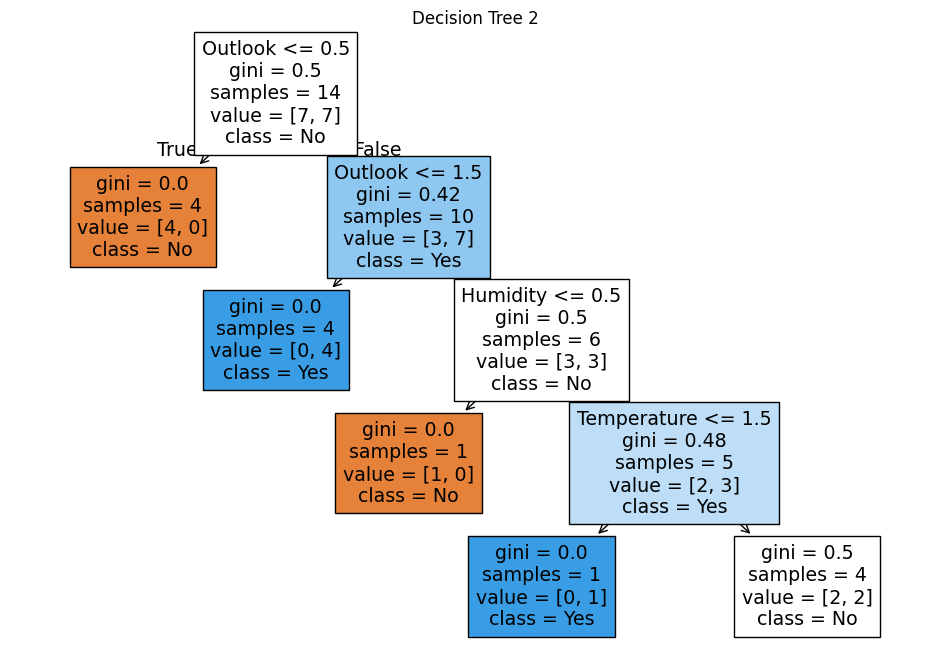

Decision Tree 3
Sampled Rows (IDs): [np.int64(11), np.int64(11), np.int64(10), np.int64(12), np.int64(12), np.int64(14), np.int64(14), np.int64(14), np.int64(3), np.int64(12), np.int64(7), np.int64(4), np.int64(9), np.int64(3)]
Sampled Features: ['Temperature', 'Wind', 'Humidity']
    Temperature  Wind  Humidity
10            1     1         1
10            1     1         1
9             1     0         1
11            1     1         0
11            1     1         0 



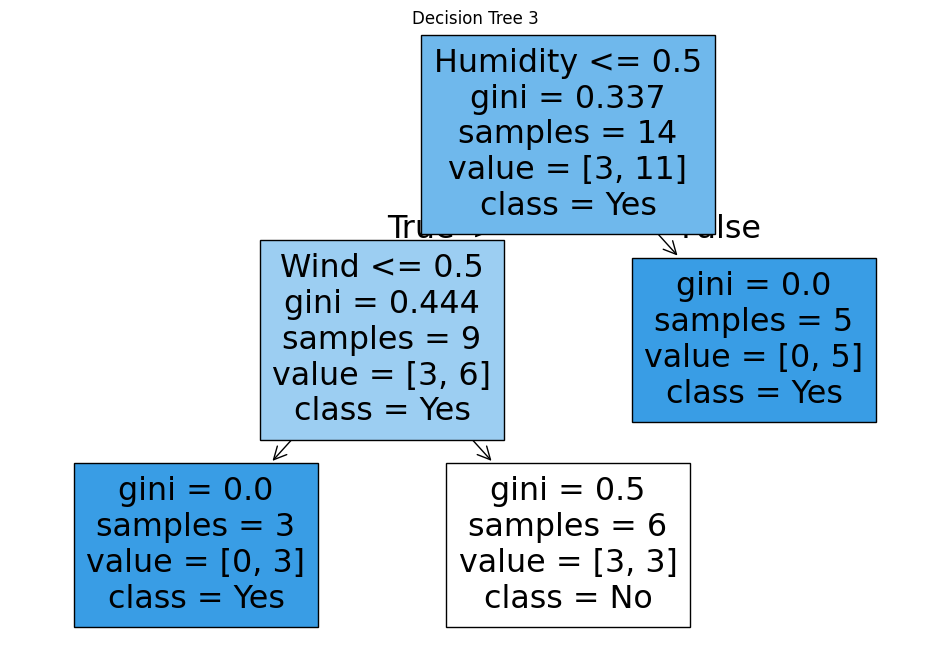

Decision Tree 4
Sampled Rows (IDs): [np.int64(5), np.int64(9), np.int64(7), np.int64(2), np.int64(4), np.int64(9), np.int64(12), np.int64(14), np.int64(2), np.int64(10), np.int64(9), np.int64(10), np.int64(5), np.int64(2)]
Sampled Features: ['Outlook', 'Temperature', 'Humidity']
   Outlook  Temperature  Humidity
4        2            2         1
8        0            2         1
6        1            2         1
1        0            0         0
3        2            1         0 



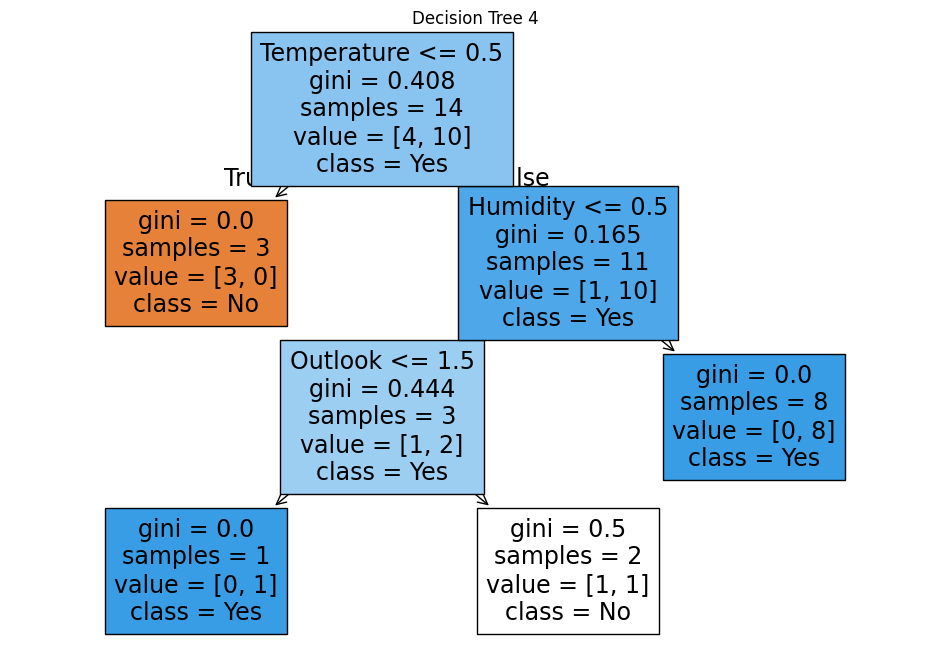

Decision Tree 5
Sampled Rows (IDs): [np.int64(7), np.int64(12), np.int64(13), np.int64(8), np.int64(3), np.int64(14), np.int64(1), np.int64(4), np.int64(2), np.int64(8), np.int64(4), np.int64(2), np.int64(14), np.int64(6)]
Sampled Features: ['Outlook', 'Humidity', 'Wind']
    Outlook  Humidity  Wind
6         1         1     1
11        1         0     1
12        1         1     0
7         0         0     0
2         1         0     0 



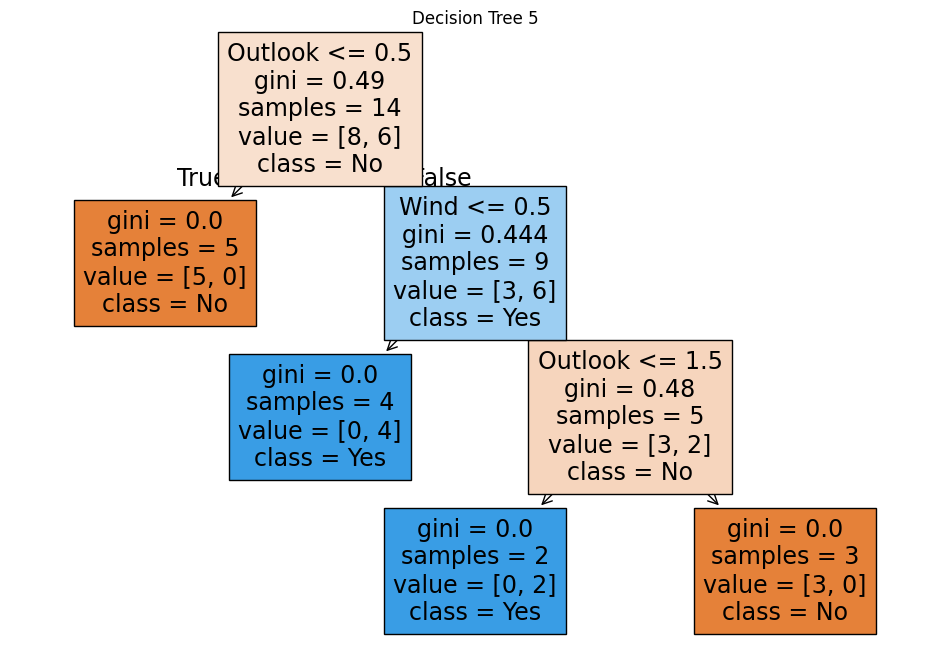

In [16]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the Play Tennis dataset
data = {
    "id": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Mild", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "Play": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Map categorical variables to numeric
df_encoded = df.copy()
df_encoded["Outlook"] = df["Outlook"].map({"Sunny": 0, "Overcast": 1, "Rain": 2})
df_encoded["Temperature"] = df["Temperature"].map({"Hot": 0, "Mild": 1, "Cool": 2})
df_encoded["Humidity"] = df["Humidity"].map({"High": 0, "Normal": 1})
df_encoded["Wind"] = df["Wind"].map({"Weak": 0, "Strong": 1})
df_encoded["Play"] = df["Play"].map({"No": 0, "Yes": 1})

# Features and target
X = df_encoded[["Outlook", "Temperature", "Humidity", "Wind"]]
y = df_encoded["Play"]

# Define number of trees and random seed
n_trees = 5  # Increase this to generate more trees
np.random.seed(42)

# Train and visualize decision trees
for i in range(1, n_trees + 1):
    # Row sampling (bootstrap sampling with replacement)
    sampled_indices = np.random.choice(X.index, size=len(X), replace=True)
    sampled_X = X.loc[sampled_indices]
    sampled_y = y.loc[sampled_indices]
    
    # Feature sampling (randomly pick 3 features for each tree)
    sampled_features = np.random.choice(X.columns, size=3, replace=False)
    sampled_X = sampled_X[sampled_features]
    
    # Train the decision tree with maximum depth
    tree_model = DecisionTreeClassifier(random_state=i)
    tree_model.fit(sampled_X, sampled_y)
    
    # Display sampled rows and features
    print(f"Decision Tree {i}")
    print(f"Sampled Rows (IDs): {list(sampled_indices + 1)}")  # +1 to match original dataset IDs
    print(f"Sampled Features: {list(sampled_features)}")
    print(sampled_X.head(), "\n")
    
    # Visualize the tree
    fig, ax = plt.subplots(figsize=(12, 8))
    plot_tree(
        tree_model, 
        feature_names=sampled_features, 
        class_names=["No", "Yes"], 
        filled=True, 
        ax=ax
    )
    plt.title(f"Decision Tree {i}")
    plt.show()
